In [27]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from pydriller import RepositoryMining, git_repository
#from pydriller.domain.commit import ModificationType
from pprint import pprint
import csv, os, re
import datetime
from itertools import cycle
from matplotlib.patches import Patch

In [2]:
bugs_keywords = ["fixed ", " bug", "fixes ","fix ",
        " fix", " fixed", " fixes", "crash","solves", " resolves",
"resolves ", " issue", "issue ", "regression", "fall back", "assertion", "coverity", "reproducible",
"stack-wanted", "steps-wanted", "testcase", "failur", "fail", "npe ",
" npe", "except", "broken", "differential testing", "error", "addresssanitizer",
"hang ", " hang", "permaorange", "random orange", "intermittent", "test fix",
"steps to reproduce", "crash", "assertion", "failure", "leak", "stack trace", "heap overflow",
        "freez", "str:", "problem ", " problem", " overflow", "overflow ", "avoid ",
        " avoid",  "workaround ", " workaround", "break ", " break", " stop", "stop "]

In [3]:
def get_modified_lines(repository, commits, filename):
    for commit in RepositoryMining(repository, only_commits=commits, only_modifications_with_file_types=['.py']).traverse_commits():
        for modified_file in commit.modifications:
            if modified_file.filename == filename:
                parsed_diff =modified_file.diff_parsed
                lines=set()
                for values in parsed_diff['added']:
                    lines.add(values[0])
                return lines

In [34]:
with open('output_data/bug_inducing_commits.csv', 'w', newline='') as output_file:
    output_writer = csv.writer(output_file)
    output_writer.writerow(['repoName','bug-fix_commit','buggy_inducing_file','buggy_inducing_commit','buggy_inducing_lines'])
    repositories=["systems/dl/adanet/","systems/dl/BerryNet/","systems/dl/DeepCTR/","systems/dl/keras-applications/","systems/dl/nn-wtf/","systems/dl/ranking/"]
    commits_inducing={}
    for repository in repositories:
        gr = git_repository.GitRepository(repository)
        repoName=repository.replace('systems/dl/','').replace('/','')
        print(repoName)
        for commit in RepositoryMining(repository).traverse_commits():
            if any(bug_word in commit.msg for bug_word in bugs_keywords):
                for modified_file in commit.modifications:
                    if modified_file.filename.endswith('.py'):
                        buggy_inducing_commits = gr.get_commits_last_modified_lines(commit, modified_file)
                        for key,value in buggy_inducing_commits.items():
                            buggy_file=key.replace('\\','/')
                            commits_inducing[repository+'@'+modified_file.filename+'@'+buggy_file]=value
                            for commit_inducing in value:
                                #lines =get_modified_lines('https://github.com/tensorflow/adanet.git',commit_inducing,modified_file.filename)                                           
                                #parsed_diff = modified_file.diff_parsed
                                #lines=set()
                                #for values in parsed_diff['added']:
                                #    lines.add(values[0])
                                #print('repoName', repoName,'bug-fix_commit', commit.hash, '\nbuggy_inducing_file',key,'\nbuggy_inducing_commit', val,'\nbuggy_inducing_lines', lines)
                                output_writer.writerow([repoName,commit.hash,buggy_file,commit_inducing])

adanet
BerryNet
DeepCTR
keras-applications
nn-wtf
ranking


In [35]:
commits_inducing

{'systems/dl/adanet/@evaluator.py@adanet/evaluator.py': {'4b21465ae8fe66a5364ad3accca278b6f86d31e6'},
 'systems/dl/adanet/@candidate.py@adanet/core/candidate.py': {'4b21465ae8fe66a5364ad3accca278b6f86d31e6'},
 'systems/dl/adanet/@candidate_test.py@adanet/core/candidate_test.py': {'4b21465ae8fe66a5364ad3accca278b6f86d31e6'},
 'systems/dl/adanet/@estimator_test.py@adanet/core/estimator_test.py': {'4b21465ae8fe66a5364ad3accca278b6f86d31e6'},
 'systems/dl/adanet/@iteration.py@adanet/core/iteration.py': {'4b21465ae8fe66a5364ad3accca278b6f86d31e6'},
 'systems/dl/adanet/@iteration_test.py@adanet/core/iteration_test.py': {'4b21465ae8fe66a5364ad3accca278b6f86d31e6'},
 'systems/dl/adanet/@testing_utils.py@adanet/core/testing_utils.py': {'4b21465ae8fe66a5364ad3accca278b6f86d31e6'},
 'systems/dl/adanet/@base_learner_report.py@adanet/core/base_learner_report.py': {'42ed5d4169e5a430e19b3a0f650c1a86606af971'},
 'systems/dl/adanet/@report_materializer.py@adanet/core/report_materializer.py': {'42ed5d41

In [36]:
with open('output_data/bug_inducing_commits_lines.csv', 'w', newline='') as output_file:
    output_writer = csv.writer(output_file)
    output_writer.writerow(['repoName','buggy_inducing_commit','buggy_inducing_file','buggy_inducing_lines'])
    for key in commits_inducing:
        repository=key.split('@')[0]
        filename=key.split('@')[1]
        file=key.split('@')[-1]
        repoName=repository.replace('systems/dl/','').replace('/','')
        print(repoName)
        for commit in RepositoryMining(repository, only_commits=commits_inducing[key]).traverse_commits():
            for modified_file in commit.modifications:
                if modified_file.filename == filename:
                    parsed_diff =modified_file.diff_parsed
                    lines=set()
                    for values in parsed_diff['added']:
                        lines.add(values[0])
                    #print(repoName,commit.hash,file,lines)
                    output_writer.writerow([repoName,commit.hash,file,lines])

adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
adanet
BerryNet
BerryNet
BerryNet
BerryNet
BerryNet
BerryNet
BerryNet
BerryNet
BerryNet
BerryNet
BerryNet
DeepCTR
DeepCTR
DeepCTR
DeepCTR
DeepCTR
DeepCTR
DeepCTR
DeepCTR
DeepCTR
DeepCTR
DeepCTR
DeepCTR
DeepCTR
DeepCTR
DeepCTR
DeepCTR
DeepCTR
DeepCTR
DeepCTR
DeepCTR
DeepCTR
DeepCTR
DeepCTR
Dee

In [63]:
lines=set()
for values in {'added': [(155,
            '  The AdaNet algorithm uses a weak learning algorithm to '
            'iteratively generate a'),
           (156,
            '  set of candidate subnetworks that attempt to minimize the loss '
            'function'),
           (157,
            '  defined in Equation (4) as part of an ensemble. At the end of '
            'each iteration,')],
 'deleted': [(155,
              '  The AdaNet algorithm uses a base learning algorithm to '
              'iteratively generate a'),
             (156,
              '  set of candidate base learners to add to an ensemble that '
              'minimizes the loss')]}['added']:
    lines.add(values[0])
    print(lines)
    

{155}
{155, 156}
{155, 156, 157}


In [6]:
def get_commits(repository):
    commits=set()
    repoName=repository.replace('systems/dl/','').replace('/','')
    print(repoName)
    for commit in RepositoryMining(repository).traverse_commits():
        commits.add(commit.hash)
    return commits

In [8]:
len(get_commits("systems/dl/adanet/"))

adanet


433

In [4]:
bug_inducing_commit_lines = pd.read_csv('output_data/bug_inducing_commits_lines.csv')
bug_inducing_commit = pd.read_csv('output_data/bug_inducing_commits.csv')

In [5]:
bug_inducing_commit_lines

,repoName,buggy_inducing_commit,buggy_inducing_file,buggy_inducing_lines
0,adanet,4b21465ae8fe66a5364ad3accca278b6f86d31e6,adanet/evaluator.py,"{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,adanet,4b21465ae8fe66a5364ad3accca278b6f86d31e6,adanet/core/candidate.py,"{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
2,adanet,4b21465ae8fe66a5364ad3accca278b6f86d31e6,adanet/core/candidate_test.py,"{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
3,adanet,4b21465ae8fe66a5364ad3accca278b6f86d31e6,adanet/core/estimator_test.py,"{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
4,adanet,4b21465ae8fe66a5364ad3accca278b6f86d31e6,adanet/core/iteration.py,"{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
...,...,...,...,...
374,ranking,b7e72bbbe439dbad99ad7e4a1f7fc00d90410017,tensorflow_ranking/python/metrics_test.py,"{47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 5..."
375,ranking,ffa03c7fb99cb48f591637cbfcece79daaad83a9,tensorflow_ranking/python/metrics_test.py,"{686, 687, 688, 689, 690, 691, 692, 693, 694, ..."
376,ranking,8340a42e056b30cfd949e8acdff380e13797c4ce,tensorflow_ranking/python/metrics_impl.py,"{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
377,ranking,cb63285bf65e8145af0443bdd6286b64a6d5449d,tensorflow_ranking/python/keras/feature.py,"{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."


# Get type1 2 and 3 

In [6]:
type1=pd.read_csv('C:/Users/Admin/Documents/polymtl/CloneProject/FromPutty/Small_Repos_A/csv_data/type1_functions.csv')
type2=pd.read_csv('C:/Users/Admin/Documents/polymtl/CloneProject/FromPutty/Small_Repos_A/csv_data/type2_functions.csv')
type3=pd.read_csv('C:/Users/Admin/Documents/polymtl/CloneProject/FromPutty/Small_Repos_A/csv_data/type3_functions.csv')

In [7]:
type1_blk=pd.read_csv('C:/Users/Admin/Documents/polymtl/CloneProject/FromPutty/Small_Repos_A/csv_data/type1_blocks.csv')
type2_blk=pd.read_csv('C:/Users/Admin/Documents/polymtl/CloneProject/FromPutty/Small_Repos_A/csv_data/type2_blocks.csv')
type3_blk=pd.read_csv('C:/Users/Admin/Documents/polymtl/CloneProject/FromPutty/Small_Repos_A/csv_data/type3_blocks.csv')

In [8]:
type1['clone_type']='Type 1'
type2['clone_type']='Type 2'
type3['clone_type']='Type 3'
type1_blk['clone_type']='Type 1'
type2_blk['clone_type']='Type 2'
type3_blk['clone_type']='Type 3'

In [9]:
type2_blk

,repository,commit_id,classid,nlines,nclones,file,startline,endline,pcid,similarity,granularity,clone_type
0,BerryNet,00e4223eeb6df5a9e29a0ad4aaa8352d093a2b24,1,11,5,berrynet/client/data_collector.py.pyindent,45,50,13,100,blocks,Type 2
1,BerryNet,00e4223eeb6df5a9e29a0ad4aaa8352d093a2b24,1,11,5,berrynet/client/data_collector.py.pyindent,64,69,19,100,blocks,Type 2
2,BerryNet,00e4223eeb6df5a9e29a0ad4aaa8352d093a2b24,1,11,5,berrynet/client/data_collector_ui.py.pyindent,61,66,56,100,blocks,Type 2
3,BerryNet,00e4223eeb6df5a9e29a0ad4aaa8352d093a2b24,1,11,5,berrynet/client/fbdashboard.py.pyindent,55,60,94,100,blocks,Type 2
4,BerryNet,00e4223eeb6df5a9e29a0ad4aaa8352d093a2b24,1,11,5,berrynet/client/data_collector_ui.py.pyindent,85,90,63,100,blocks,Type 2
...,...,...,...,...,...,...,...,...,...,...,...,...
31305,adanet,ff6ab1eee6b93b912b3b020957c51b83b8da4b95,1,7,2,adanet/autoensemble/tpu_estimator_test.py.pyin...,85,92,71,100,blocks,Type 2
31306,adanet,ff6ab1eee6b93b912b3b020957c51b83b8da4b95,2,8,2,adanet/core/architecture_test.py.pyindent,47,51,105,100,blocks,Type 2
31307,adanet,ff6ab1eee6b93b912b3b020957c51b83b8da4b95,2,8,2,adanet/core/architecture_test.py.pyindent,70,74,107,100,blocks,Type 2
31308,adanet,ff6ab1eee6b93b912b3b020957c51b83b8da4b95,3,6,2,adanet/core/evaluator_test.py.pyindent,121,126,277,100,blocks,Type 2


In [10]:
clones = [type1, type2, type3,type1_blk, type2_blk, type3_blk ]

clones_df = pd.concat(clones)

In [11]:
clones_df

,repository,commit_id,classid,nlines,nclones,file,startline,endline,pcid,similarity,granularity,clone_type
0,adanet,001d2986a1311ed9f36d59bd49c3e97abe6f2491,1,6,2,adanet/core/testing_utils.py.pyindent,44,51,224,100,functions,Type 1
1,adanet,001d2986a1311ed9f36d59bd49c3e97abe6f2491,1,6,2,adanet/subnetwork/generator_test.py.pyindent,29,36,344,100,functions,Type 1
2,adanet,001d2986a1311ed9f36d59bd49c3e97abe6f2491,2,6,2,adanet/ensemble/ensembler.py.pyindent,40,46,294,100,functions,Type 1
3,adanet,001d2986a1311ed9f36d59bd49c3e97abe6f2491,2,6,2,adanet/subnetwork/generator.py.pyindent,55,61,335,100,functions,Type 1
4,adanet,001d2986a1311ed9f36d59bd49c3e97abe6f2491,3,5,2,adanet/examples/nasnet.py.pyindent,232,236,320,100,functions,Type 1
...,...,...,...,...,...,...,...,...,...,...,...,...
67992,ranking,ffa03c7fb99cb48f591637cbfcece79daaad83a9,30,14,3,tensorflow_ranking/python/metrics_test.py.pyin...,220,231,470,71,blocks,Type 3
67993,ranking,ffa03c7fb99cb48f591637cbfcece79daaad83a9,30,14,3,tensorflow_ranking/python/metrics_test.py.pyin...,472,481,491,71,blocks,Type 3
67994,ranking,ffa03c7fb99cb48f591637cbfcece79daaad83a9,30,14,3,tensorflow_ranking/python/metrics_test.py.pyin...,251,261,474,71,blocks,Type 3
67995,ranking,ffa03c7fb99cb48f591637cbfcece79daaad83a9,31,11,2,tensorflow_ranking/python/utils_test.py.pyindent,207,222,631,90,blocks,Type 3


In [14]:
clones_df.file=clones_df.file.str.replace('.pyindent','')

In [15]:
clones_df.to_csv('output_data/clones.csv',index=False)

In [12]:
clones_df = pd.read_csv('output_data/clones.csv')

In [13]:
bug_inducing_commits=pd.read_csv('output_data/bug_inducing_commits.csv')

In [14]:
clones_df

,repository,commit_id,classid,nlines,nclones,file,startline,endline,pcid,similarity,granularity,clone_type
0,adanet,001d2986a1311ed9f36d59bd49c3e97abe6f2491,1,6,2,adanet/core/testing_utils.py,44,51,224,100,functions,Type 1
1,adanet,001d2986a1311ed9f36d59bd49c3e97abe6f2491,1,6,2,adanet/subnetwork/generator_test.py,29,36,344,100,functions,Type 1
2,adanet,001d2986a1311ed9f36d59bd49c3e97abe6f2491,2,6,2,adanet/ensemble/ensembler.py,40,46,294,100,functions,Type 1
3,adanet,001d2986a1311ed9f36d59bd49c3e97abe6f2491,2,6,2,adanet/subnetwork/generator.py,55,61,335,100,functions,Type 1
4,adanet,001d2986a1311ed9f36d59bd49c3e97abe6f2491,3,5,2,adanet/examples/nasnet.py,232,236,320,100,functions,Type 1
...,...,...,...,...,...,...,...,...,...,...,...,...
268355,ranking,ffa03c7fb99cb48f591637cbfcece79daaad83a9,30,14,3,tensorflow_ranking/python/metrics_test.py,220,231,470,71,blocks,Type 3
268356,ranking,ffa03c7fb99cb48f591637cbfcece79daaad83a9,30,14,3,tensorflow_ranking/python/metrics_test.py,472,481,491,71,blocks,Type 3
268357,ranking,ffa03c7fb99cb48f591637cbfcece79daaad83a9,30,14,3,tensorflow_ranking/python/metrics_test.py,251,261,474,71,blocks,Type 3
268358,ranking,ffa03c7fb99cb48f591637cbfcece79daaad83a9,31,11,2,tensorflow_ranking/python/utils_test.py,207,222,631,90,blocks,Type 3


In [15]:
bug_inducing_commit_lines

,repoName,buggy_inducing_commit,buggy_inducing_file,buggy_inducing_lines
0,adanet,4b21465ae8fe66a5364ad3accca278b6f86d31e6,adanet/evaluator.py,"{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,adanet,4b21465ae8fe66a5364ad3accca278b6f86d31e6,adanet/core/candidate.py,"{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
2,adanet,4b21465ae8fe66a5364ad3accca278b6f86d31e6,adanet/core/candidate_test.py,"{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
3,adanet,4b21465ae8fe66a5364ad3accca278b6f86d31e6,adanet/core/estimator_test.py,"{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
4,adanet,4b21465ae8fe66a5364ad3accca278b6f86d31e6,adanet/core/iteration.py,"{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
...,...,...,...,...
374,ranking,b7e72bbbe439dbad99ad7e4a1f7fc00d90410017,tensorflow_ranking/python/metrics_test.py,"{47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 5..."
375,ranking,ffa03c7fb99cb48f591637cbfcece79daaad83a9,tensorflow_ranking/python/metrics_test.py,"{686, 687, 688, 689, 690, 691, 692, 693, 694, ..."
376,ranking,8340a42e056b30cfd949e8acdff380e13797c4ce,tensorflow_ranking/python/metrics_impl.py,"{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
377,ranking,cb63285bf65e8145af0443bdd6286b64a6d5449d,tensorflow_ranking/python/keras/feature.py,"{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."


In [16]:
result = pd.merge(bug_inducing_commit_lines, clones_df.rename(columns={'repository':'repoName', 'commit_id':'buggy_inducing_commit', 'file':'buggy_inducing_file'}), how='left', on=['repoName', 'buggy_inducing_commit', 'buggy_inducing_file'])

In [129]:
result_inv = pd.merge(clones_df.rename(columns={'repository':'repoName', 'commit_id':'buggy_inducing_commit', 'file':'buggy_inducing_file'}),bug_inducing_commit_lines,  how='left', on=['repoName', 'buggy_inducing_commit', 'buggy_inducing_file'])

In [165]:
type1

,repoName,buggy_inducing_commit,classid,nlines,nclones,buggy_inducing_file,startline,endline,pcid,similarity,granularity,clone_type,buggy_inducing_lines,buggy_or_not
0,adanet,001d2986a1311ed9f36d59bd49c3e97abe6f2491,1,6,2,adanet/core/testing_utils.py,44,51,224,100,functions,Type 1,NaN,non buggy
1,adanet,001d2986a1311ed9f36d59bd49c3e97abe6f2491,1,6,2,adanet/subnetwork/generator_test.py,29,36,344,100,functions,Type 1,NaN,non buggy
2,adanet,001d2986a1311ed9f36d59bd49c3e97abe6f2491,2,6,2,adanet/ensemble/ensembler.py,40,46,294,100,functions,Type 1,NaN,non buggy
3,adanet,001d2986a1311ed9f36d59bd49c3e97abe6f2491,2,6,2,adanet/subnetwork/generator.py,55,61,335,100,functions,Type 1,NaN,non buggy
4,adanet,001d2986a1311ed9f36d59bd49c3e97abe6f2491,3,5,2,adanet/examples/nasnet.py,232,236,320,100,functions,Type 1,NaN,non buggy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169072,ranking,ffa03c7fb99cb48f591637cbfcece79daaad83a9,8,5,2,tensorflow_ranking/python/losses_test.py,144,147,270,100,blocks,Type 1,NaN,non buggy
169073,ranking,ffa03c7fb99cb48f591637cbfcece79daaad83a9,9,8,2,tensorflow_ranking/python/losses_test.py,1045,1049,378,100,blocks,Type 1,NaN,non buggy
169074,ranking,ffa03c7fb99cb48f591637cbfcece79daaad83a9,9,8,2,tensorflow_ranking/python/metrics_test.py,132,136,462,100,blocks,Type 1,"{686, 687, 688, 689, 690, 691, 692, 693, 694, ...",buggy
169075,ranking,ffa03c7fb99cb48f591637cbfcece79daaad83a9,10,6,2,tensorflow_ranking/python/metrics.py,554,559,428,100,blocks,Type 1,NaN,non buggy


In [137]:
def buggy_or_not(row):
    if row['buggy_inducing_lines'] is np.NaN:
        return 'non buggy'
    else:
        return 'buggy'

In [138]:
result_inv['buggy_or_not']=result_inv.apply(buggy_or_not, axis=1)

In [144]:
type1 = result_inv[result_inv['clone_type']=='Type 1']
type2 = result_inv[result_inv['clone_type']=='Type 2']
type3 = result_inv[result_inv['clone_type']=='Type 3']

In [162]:
type1_b = type1[type1['granularity']=='functions']
type2_b = type2[type2['granularity']=='functions']
type3_b = type3[type3['granularity']=='functions']

In [164]:
type1_b[type1_b['buggy_or_not']=='buggy'].count()

repoName                 27
buggy_inducing_commit    27
classid                  27
nlines                   27
nclones                  27
buggy_inducing_file      27
startline                27
endline                  27
pcid                     27
similarity               27
granularity              27
clone_type               27
buggy_inducing_lines     27
buggy_or_not             27
dtype: int64

In [18]:
def lines_intersects_with_clone_code(lines, start_line, end_line):
    print(lines, start_line,end_line)
    print(type(lines), type(start_line),type(end_line))
    found = list(filter(lambda x: start_line <= x <= end_line, lines))
    print(found)
    if len(found)>0:
        return True
    else:
        return False

In [19]:
global i
i=0 #1341 

In [20]:
def get_clone_code_flag(raw):
    lines=raw['buggy_inducing_lines']
    buggy_file=raw['buggy_inducing_file']
    start_line = raw['startline']
    end_line = raw['endline']
    global i
    i=i+1
    print(i)
    print('startline ----->',start_line)
    print('endline ----->',end_line)
    if isNaN(start_line) or  isNaN(end_line):
        print('not clone')
        return False
    else:
        if lines_intersects_with_clone_code(transform_lines_to_set(lines), int(start_line), int(end_line)):
            print('yes clone')
            return True
        else:
            return False

In [21]:
def isNaN(string):
    return string != string

In [11]:
def transform_lines_to_set(lines):
    lines_list=set()
    for i in lines.split(','):
        lines_list.add(int(i.replace('{','').replace('}','')))
    return lines_list

In [22]:
result['is_clone_code']=result.apply(get_clone_code_flag, axis=1)

1
startline -----> nan
endline -----> nan
not clone
2
startline -----> nan
endline -----> nan
not clone
3
startline -----> nan
endline -----> nan
not clone
4
startline -----> nan
endline -----> nan
not clone
5
startline -----> nan
endline -----> nan
not clone
6
startline -----> nan
endline -----> nan
not clone
7
startline -----> nan
endline -----> nan
not clone
8
startline -----> nan
endline -----> nan
not clone
9
startline -----> nan
endline -----> nan
not clone
10
startline -----> nan
endline -----> nan
not clone
11
startline -----> nan
endline -----> nan
not clone
12
startline -----> nan
endline -----> nan
not clone
13
startline -----> nan
endline -----> nan
not clone
14
startline -----> nan
endline -----> nan
not clone
15
startline -----> nan
endline -----> nan
not clone
16
startline -----> nan
endline -----> nan
not clone
17
startline -----> nan
endline -----> nan
not clone
18
startline -----> nan
endline -----> nan
not clone
19
startline -----> nan
endline -----> nan
not clone
20

NameError: ("name 'transform_lines_to_set' is not defined", 'occurred at index 24')

In [13]:
result

,repoName,buggy_inducing_commit,buggy_inducing_file,buggy_inducing_lines,classid,nlines,nclones,startline,endline,pcid,similarity,granularity,clone_type,is_clone_code
0,adanet,4b21465ae8fe66a5364ad3accca278b6f86d31e6,adanet/evaluator.py,"{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,adanet,4b21465ae8fe66a5364ad3accca278b6f86d31e6,adanet/core/candidate.py,"{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,adanet,4b21465ae8fe66a5364ad3accca278b6f86d31e6,adanet/core/candidate_test.py,"{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,adanet,4b21465ae8fe66a5364ad3accca278b6f86d31e6,adanet/core/estimator_test.py,"{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,adanet,4b21465ae8fe66a5364ad3accca278b6f86d31e6,adanet/core/iteration.py,"{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924,ranking,8340a42e056b30cfd949e8acdff380e13797c4ce,tensorflow_ranking/python/metrics_impl.py,"{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",14.0,6.0,2.0,353.0,358.0,447.0,100.0,blocks,Type 2,True
1925,ranking,8340a42e056b30cfd949e8acdff380e13797c4ce,tensorflow_ranking/python/metrics_impl.py,"{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",29.0,38.0,2.0,301.0,343.0,442.0,82.0,blocks,Type 3,True
1926,ranking,8340a42e056b30cfd949e8acdff380e13797c4ce,tensorflow_ranking/python/metrics_impl.py,"{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",29.0,38.0,2.0,345.0,380.0,446.0,82.0,blocks,Type 3,True
1927,ranking,cb63285bf65e8145af0443bdd6286b64a6d5449d,tensorflow_ranking/python/keras/feature.py,"{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [14]:
1701/1930

0.8813471502590674

In [15]:
result[result['is_clone_code']==True]

,repoName,buggy_inducing_commit,buggy_inducing_file,buggy_inducing_lines,classid,nlines,nclones,startline,endline,pcid,similarity,granularity,clone_type,is_clone_code
24,adanet,08ccb5f616795da61f6cc74f5992f7819781b605,adanet/core/freezer.py,"{556, 557, 526, 527, 285, 286}",7.0,9.0,2.0,522.0,538.0,69.0,88.0,functions,Type 3,True
25,adanet,08ccb5f616795da61f6cc74f5992f7819781b605,adanet/core/freezer.py,"{556, 557, 526, 527, 285, 286}",7.0,9.0,2.0,552.0,567.0,71.0,88.0,functions,Type 3,True
26,adanet,b5ca0c0dfd5b1afd8283262038b2b47be5e5990b,adanet/core/freezer.py,"{422, 39, 394, 427, 49, 412, 411, 220, 413}",8.0,24.0,2.0,204.0,237.0,60.0,70.0,functions,Type 3,True
28,adanet,b5ca0c0dfd5b1afd8283262038b2b47be5e5990b,adanet/core/freezer.py,"{422, 39, 394, 427, 49, 412, 411, 220, 413}",9.0,49.0,2.0,383.0,428.0,66.0,73.0,functions,Type 3,True
32,adanet,0953ca2e5690eb258a8787435e498fa6917238b6,adanet/core/freezer.py,"{516, 520, 521, 527, 529, 530, 22, 23, 535, 53...",7.0,24.0,2.0,204.0,237.0,43.0,70.0,functions,Type 3,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1922,ranking,8340a42e056b30cfd949e8acdff380e13797c4ce,tensorflow_ranking/python/metrics_impl.py,"{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",10.0,6.0,2.0,353.0,358.0,447.0,100.0,blocks,Type 1,True
1923,ranking,8340a42e056b30cfd949e8acdff380e13797c4ce,tensorflow_ranking/python/metrics_impl.py,"{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",14.0,6.0,2.0,309.0,314.0,443.0,100.0,blocks,Type 2,True
1924,ranking,8340a42e056b30cfd949e8acdff380e13797c4ce,tensorflow_ranking/python/metrics_impl.py,"{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",14.0,6.0,2.0,353.0,358.0,447.0,100.0,blocks,Type 2,True
1925,ranking,8340a42e056b30cfd949e8acdff380e13797c4ce,tensorflow_ranking/python/metrics_impl.py,"{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",29.0,38.0,2.0,301.0,343.0,442.0,82.0,blocks,Type 3,True


In [136]:
result[result['clone_type']=='Type 2']

,repoName,buggy_inducing_commit,buggy_inducing_file,buggy_inducing_lines,classid,nlines,nclones,startline,endline,pcid,similarity,granularity,clone_type,is_clone_code
0,adanet,4b21465ae8fe66a5364ad3accca278b6f86d31e6,adanet/evaluator.py,"{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",2.0,6.0,2.0,31.0,49.0,37.0,100.0,functions,Type 2,True
39,adanet,0953ca2e5690eb258a8787435e498fa6917238b6,adanet/core/freezer.py,"{516, 520, 521, 527, 529, 530, 22, 23, 535, 53...",3.0,9.0,2.0,225.0,231.0,143.0,100.0,blocks,Type 2,True
40,adanet,0953ca2e5690eb258a8787435e498fa6917238b6,adanet/core/freezer.py,"{516, 520, 521, 527, 529, 530, 22, 23, 535, 53...",3.0,9.0,2.0,263.0,270.0,145.0,100.0,blocks,Type 2,True
84,adanet,2b16eb22a740e6929683b3922d52b5718f9cd9c1,adanet/autoensemble/estimator_test.py,"{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",1.0,6.0,2.0,34.0,39.0,9.0,100.0,functions,Type 2,True
87,adanet,2b16eb22a740e6929683b3922d52b5718f9cd9c1,adanet/autoensemble/estimator_test.py,"{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",2.0,5.0,2.0,35.0,39.0,20.0,100.0,blocks,Type 2,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1914,ranking,8340a42e056b30cfd949e8acdff380e13797c4ce,tensorflow_ranking/python/metrics_impl.py,"{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",11.0,5.0,3.0,263.0,267.0,184.0,100.0,functions,Type 2,True
1915,ranking,8340a42e056b30cfd949e8acdff380e13797c4ce,tensorflow_ranking/python/metrics_impl.py,"{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",12.0,12.0,2.0,303.0,314.0,187.0,100.0,functions,Type 2,True
1916,ranking,8340a42e056b30cfd949e8acdff380e13797c4ce,tensorflow_ranking/python/metrics_impl.py,"{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",12.0,12.0,2.0,347.0,358.0,190.0,100.0,functions,Type 2,True
1924,ranking,8340a42e056b30cfd949e8acdff380e13797c4ce,tensorflow_ranking/python/metrics_impl.py,"{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",14.0,6.0,2.0,309.0,314.0,443.0,100.0,blocks,Type 2,True


In [99]:
result_types=result.dropna()

In [114]:
result_types=result_types[result_types['granularity']=='functions']

In [115]:
result_types_per_proj = result_types.groupby(['repoName','clone_type']).agg({'nclones':'sum'}).reset_index()

In [116]:
result_types_per_proj

,repoName,clone_type,nclones
0,BerryNet,Type 1,14.0
1,BerryNet,Type 2,19.0
2,BerryNet,Type 3,65.0
3,DeepCTR,Type 1,14.0
4,DeepCTR,Type 2,54.0
5,DeepCTR,Type 3,2225.0
6,adanet,Type 1,10.0
7,adanet,Type 2,82.0
8,adanet,Type 3,487.0
9,keras-applications,Type 2,8.0


In [117]:
result_types_per_proj_size=result_types_per_proj.groupby(['repoName']).agg({'nclones':'sum'}).reset_index()

In [118]:
result_types_per_proj_size=result_types_per_proj_size.rename(columns={"nclones": "total_fragments"})

In [119]:
result_types_per_proj = pd.merge(result_types_per_proj,result_types_per_proj_size[['repoName','total_fragments']],how='left', on=['repoName'])

In [120]:
result_types_per_proj['percentage']=(result_types_per_proj['nclones']/result_types_per_proj['total_fragments'])*100

In [121]:
result_types_per_proj

,repoName,clone_type,nclones,total_fragments,percentage
0,BerryNet,Type 1,14.0,98.0,14.285714
1,BerryNet,Type 2,19.0,98.0,19.387755
2,BerryNet,Type 3,65.0,98.0,66.326531
3,DeepCTR,Type 1,14.0,2293.0,0.610554
4,DeepCTR,Type 2,54.0,2293.0,2.354993
5,DeepCTR,Type 3,2225.0,2293.0,97.034453
6,adanet,Type 1,10.0,579.0,1.727116
7,adanet,Type 2,82.0,579.0,14.162349
8,adanet,Type 3,487.0,579.0,84.110535
9,keras-applications,Type 2,8.0,89.0,8.988764


[Text(0, 0.5, 'Percentage of Number of fragments'), Text(0.5, 0, ' ')]

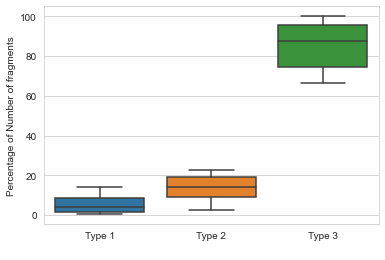

In [122]:
#sns.set_style("whitegrid")
#plt.figure(figsize=(5,5))
g = sns.boxplot(x="clone_type", y="percentage", data=result_types_per_proj,showfliers=False)
#g.set_yscale("log")
g.set(xlabel=' ', ylabel='Percentage of Number of fragments')
#plt.title('Time consumed to fix bugs')

In [123]:
result_types_per_proj[result_types_per_proj['clone_type']=='Type 1'].nclones.sum()

61.0

In [124]:
result_types_per_proj[result_types_per_proj['clone_type']=='Type 2'].nclones.sum()

243.0

In [125]:
result_types_per_proj[result_types_per_proj['clone_type']=='Type 3'].nclones.sum()

3164.0

In [34]:
result.to_csv('output_data/buggy_commits_lines_flag_clone.csv', index=False)

In [23]:
result = pd.read_csv('output_data/buggy_commits_lines_flag_clone.csv')

In [117]:
a=np.NaN

In [120]:
if a in  ('functions', 'blocks'):
    print('yes')
else :
    print('No')

No


In [24]:
fct = result[result['granularity']=='functions']
block = result[result['granularity']=='blocks']

In [25]:
result['clone_occs']=1

In [26]:
buggy_clones_by_type = result[result['is_clone_code']==True].groupby(['repoName','granularity','clone_type']).agg({'clone_occs':'sum'}).reset_index()

In [89]:
buggy_clones_by_type

,repoName,granularity,clone_type,clone_occs
0,BerryNet,blocks,Type 1,12
1,BerryNet,blocks,Type 2,17
2,BerryNet,blocks,Type 3,32
3,BerryNet,functions,Type 1,7
4,BerryNet,functions,Type 2,8
5,BerryNet,functions,Type 3,22
6,DeepCTR,blocks,Type 1,31
7,DeepCTR,blocks,Type 2,110
8,DeepCTR,blocks,Type 3,677
9,DeepCTR,functions,Type 1,5


In [90]:
buggy_fct=buggy_clones_by_type[buggy_clones_by_type['granularity']=='functions']
buggy_blk=buggy_clones_by_type[buggy_clones_by_type['granularity']=='blocks']

In [91]:
buggy_fct

,repoName,granularity,clone_type,clone_occs
3,BerryNet,functions,Type 1,7
4,BerryNet,functions,Type 2,8
5,BerryNet,functions,Type 3,22
9,DeepCTR,functions,Type 1,5
10,DeepCTR,functions,Type 2,25
11,DeepCTR,functions,Type 3,260
15,adanet,functions,Type 1,5
16,adanet,functions,Type 2,33
17,adanet,functions,Type 3,144
20,keras-applications,functions,Type 2,4


In [92]:
7+5+5+10

27

In [93]:
8+25+33+4+2

72

In [94]:
22+260+144+9+15+80

530

Text(0.5, 1.0, 'Clone occurrences in buggy code by granularity and by clone type')

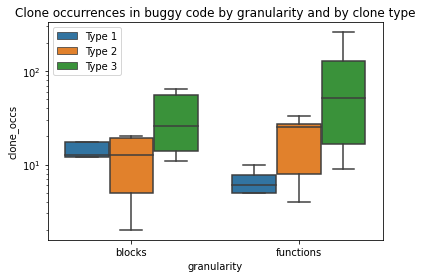

In [29]:
ml_trad_boxplot = sns.boxplot(x="granularity", y="clone_occs", data=buggy_clones_by_type, showfliers=False, hue='clone_type')
ml_trad_boxplot.set_yscale("log")
plt.legend(loc='best')
plt.title('Clone occurrences in buggy code by granularity and by clone type')

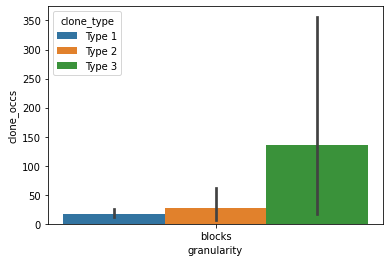

In [30]:
sns.barplot(x="granularity", y="clone_occs", data=buggy_blk, hue='clone_type')

31


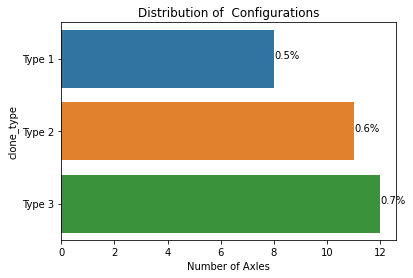

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#df = pd.DataFrame(np.array([['a'], ['a'], ['b']]), columns=['current_status'])
ax = sns.countplot(y="clone_type", data=buggy_clones_by_type)
plt.title('Distribution of  Configurations')
plt.xlabel('Number of Axles')

total = len(buggy_clones_by_type['clone_type'])
print(total)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/1701)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

In [158]:
95+259+1347

1701

In [168]:
1347/1701*100

79.18871252204586

In [26]:
df = pd.DataFrame()
df['percent'] = pd.Series([5.58, 15.23, 79.19 ])
df['Clone Type'] = pd.Series(['Type 1', 'Type 2', 'Type 3'])


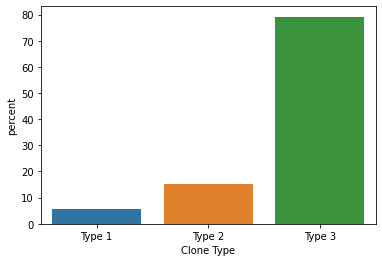

In [27]:
sns.barplot(x='Clone Type',y='percent',data=df)

In [28]:
[5.58, 15.23, 79.19 ]

[5.58, 15.23, 79.19]

In [20]:
dl_type1_block = buggy_blk[buggy_blk['clone_type']=='Type 1']
dl_type2_block = buggy_blk[buggy_blk['clone_type']=='Type 2']
dl_type3_block = buggy_blk[buggy_blk['clone_type']=='Type 3']
dl_type1_fct = buggy_fct[buggy_fct['clone_type']=='Type 1']
dl_type2_fct = buggy_fct[buggy_fct['clone_type']=='Type 2']
dl_type3_fct = buggy_fct[buggy_fct['clone_type']=='Type 3']

In [30]:
stats.mannwhitneyu(dl_type1_block.clone_occs,dl_type3_block.clone_occs)

MannwhitneyuResult(statistic=8.0, pvalue=0.2249999380928034)

In [31]:
dl_type1_block

,repoName,granularity,clone_type,clone_occs
0,BerryNet,blocks,Type 1,12
6,DeepCTR,blocks,Type 1,31
12,adanet,blocks,Type 1,13
25,ranking,blocks,Type 1,12


In [33]:
# def get_clone_code_flag(raw):
#     repoName=raw['repoName']
#     buggy_commit=raw['buggy_inducing_commit']
#     lines=raw['buggy_inducing_lines']
#     buggy_file=raw['buggy_inducing_file']
#     print(repoName)
#     global i
#     i=i+1
#     print(i)
#     for index, row in clones_df.iterrows():
#             if(row['repository'] == repoName) and (row['commit_id'] == buggy_commit) and (row['file'] == buggy_file):
#                 start_line=row['startline']
#                 end_line=row['endline']
#                 if lines_intersects_with_clone_code(list(lines), start_line, end_line):
#                     print('yes clone')
#                     return True

In [34]:
bug_inducing_commits.loc[20]

repoName                                                   adanet
bug-fix_commit           48599be4e389124fa736272ca91ca77fefcba624
buggy_inducing_file                  adanet/core/testing_utils.py
buggy_inducing_commit    4b21465ae8fe66a5364ad3accca278b6f86d31e6
Name: 20, dtype: object

In [35]:
bug_inducing_commits

,repoName,bug-fix_commit,buggy_inducing_file,buggy_inducing_commit
0,adanet,28f70c3980d4c57cac2dba0a8269284f82f65584,adanet/evaluator.py,4b21465ae8fe66a5364ad3accca278b6f86d31e6
1,adanet,0ce83c23a8bb71c75ad31fb33b6e98de6caf83d3,adanet/core/candidate.py,4b21465ae8fe66a5364ad3accca278b6f86d31e6
2,adanet,0ce83c23a8bb71c75ad31fb33b6e98de6caf83d3,adanet/core/candidate_test.py,4b21465ae8fe66a5364ad3accca278b6f86d31e6
3,adanet,0ce83c23a8bb71c75ad31fb33b6e98de6caf83d3,adanet/core/estimator_test.py,4b21465ae8fe66a5364ad3accca278b6f86d31e6
4,adanet,0ce83c23a8bb71c75ad31fb33b6e98de6caf83d3,adanet/core/iteration.py,4b21465ae8fe66a5364ad3accca278b6f86d31e6
...,...,...,...,...
1336,ranking,09ea762d132b3a74a185802f0d710c14e63d6559,tensorflow_ranking/python/metrics_test.py,24405d51672777d9ff8be7cd16829efbeeb0362e
1337,ranking,b859d5f5e3ba8eef2725cc2a71eca708c7cb7993,tensorflow_ranking/python/data.py,d36d7fb92ba141a0f2493ec877dc4201c804fe0a
1338,ranking,7dbfc71cc427e3bd7e97e083a9abeb1ba1bf44bf,tensorflow_ranking/python/metrics.py,24405d51672777d9ff8be7cd16829efbeeb0362e
1339,ranking,534ee5ab3b17e65570c81be3956e5ede5dd780a8,tensorflow_ranking/python/keras/feature.py,cb63285bf65e8145af0443bdd6286b64a6d5449d


In [36]:
result

,repoName,buggy_inducing_commit,buggy_inducing_file,buggy_inducing_lines,classid,nlines,nclones,startline,endline,pcid,similarity,granularity,clone_type,is_clone_code,clone_occs
0,adanet,4b21465ae8fe66a5364ad3accca278b6f86d31e6,adanet/evaluator.py,"{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1
1,adanet,4b21465ae8fe66a5364ad3accca278b6f86d31e6,adanet/core/candidate.py,"{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1
2,adanet,4b21465ae8fe66a5364ad3accca278b6f86d31e6,adanet/core/candidate_test.py,"{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1
3,adanet,4b21465ae8fe66a5364ad3accca278b6f86d31e6,adanet/core/estimator_test.py,"{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1
4,adanet,4b21465ae8fe66a5364ad3accca278b6f86d31e6,adanet/core/iteration.py,"{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924,ranking,8340a42e056b30cfd949e8acdff380e13797c4ce,tensorflow_ranking/python/metrics_impl.py,"{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",14.0,6.0,2.0,353.0,358.0,447.0,100.0,blocks,Type 2,True,1
1925,ranking,8340a42e056b30cfd949e8acdff380e13797c4ce,tensorflow_ranking/python/metrics_impl.py,"{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",29.0,38.0,2.0,301.0,343.0,442.0,82.0,blocks,Type 3,True,1
1926,ranking,8340a42e056b30cfd949e8acdff380e13797c4ce,tensorflow_ranking/python/metrics_impl.py,"{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",29.0,38.0,2.0,345.0,380.0,446.0,82.0,blocks,Type 3,True,1
1927,ranking,cb63285bf65e8145af0443bdd6286b64a6d5449d,tensorflow_ranking/python/keras/feature.py,"{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1


In [31]:
bug_commits = pd.merge(bug_inducing_commits, result[['repoName', 'buggy_inducing_commit', 'buggy_inducing_file','is_clone_code']] , how='left', on=['repoName', 'buggy_inducing_commit', 'buggy_inducing_file'])

In [32]:
bug_commits[bug_commits['is_clone_code']==False]

,repoName,bug-fix_commit,buggy_inducing_file,buggy_inducing_commit,is_clone_code
0,adanet,28f70c3980d4c57cac2dba0a8269284f82f65584,adanet/evaluator.py,4b21465ae8fe66a5364ad3accca278b6f86d31e6,False
1,adanet,0ce83c23a8bb71c75ad31fb33b6e98de6caf83d3,adanet/core/candidate.py,4b21465ae8fe66a5364ad3accca278b6f86d31e6,False
2,adanet,0ce83c23a8bb71c75ad31fb33b6e98de6caf83d3,adanet/core/candidate_test.py,4b21465ae8fe66a5364ad3accca278b6f86d31e6,False
3,adanet,0ce83c23a8bb71c75ad31fb33b6e98de6caf83d3,adanet/core/estimator_test.py,4b21465ae8fe66a5364ad3accca278b6f86d31e6,False
4,adanet,0ce83c23a8bb71c75ad31fb33b6e98de6caf83d3,adanet/core/iteration.py,4b21465ae8fe66a5364ad3accca278b6f86d31e6,False
...,...,...,...,...,...
3603,ranking,b56ff127f00976556ab95216426191b0768e74ee,tensorflow_ranking/examples/tf_ranking_libsvm.py,368cff0bd610920c067a355d87e6078e8c0274d4,False
3620,ranking,2ace09360383b99a3ebcab823c44c02c7c9f242d,tensorflow_ranking/python/feature.py,368cff0bd610920c067a355d87e6078e8c0274d4,False
3791,ranking,b859d5f5e3ba8eef2725cc2a71eca708c7cb7993,tensorflow_ranking/python/data.py,d36d7fb92ba141a0f2493ec877dc4201c804fe0a,False
3849,ranking,534ee5ab3b17e65570c81be3956e5ede5dd780a8,tensorflow_ranking/python/keras/feature.py,cb63285bf65e8145af0443bdd6286b64a6d5449d,False


In [33]:
bug_commits[['buggy_inducing_commit','buggy_inducing_file']].nunique()

buggy_inducing_commit    300
buggy_inducing_file      210
dtype: int64

In [54]:
bug_commits

,repoName,bug-fix_commit,buggy_inducing_file,buggy_inducing_commit,is_clone_code
0,adanet,28f70c3980d4c57cac2dba0a8269284f82f65584,adanet/evaluator.py,4b21465ae8fe66a5364ad3accca278b6f86d31e6,False
1,adanet,0ce83c23a8bb71c75ad31fb33b6e98de6caf83d3,adanet/core/candidate.py,4b21465ae8fe66a5364ad3accca278b6f86d31e6,False
2,adanet,0ce83c23a8bb71c75ad31fb33b6e98de6caf83d3,adanet/core/candidate_test.py,4b21465ae8fe66a5364ad3accca278b6f86d31e6,False
3,adanet,0ce83c23a8bb71c75ad31fb33b6e98de6caf83d3,adanet/core/estimator_test.py,4b21465ae8fe66a5364ad3accca278b6f86d31e6,False
4,adanet,0ce83c23a8bb71c75ad31fb33b6e98de6caf83d3,adanet/core/iteration.py,4b21465ae8fe66a5364ad3accca278b6f86d31e6,False
...,...,...,...,...,...
3846,ranking,7dbfc71cc427e3bd7e97e083a9abeb1ba1bf44bf,tensorflow_ranking/python/metrics.py,24405d51672777d9ff8be7cd16829efbeeb0362e,True
3847,ranking,7dbfc71cc427e3bd7e97e083a9abeb1ba1bf44bf,tensorflow_ranking/python/metrics.py,24405d51672777d9ff8be7cd16829efbeeb0362e,True
3848,ranking,7dbfc71cc427e3bd7e97e083a9abeb1ba1bf44bf,tensorflow_ranking/python/metrics.py,24405d51672777d9ff8be7cd16829efbeeb0362e,True
3849,ranking,534ee5ab3b17e65570c81be3956e5ede5dd780a8,tensorflow_ranking/python/keras/feature.py,cb63285bf65e8145af0443bdd6286b64a6d5449d,False


In [34]:
def clone_code(row):
    if row['is_clone_code'] == True:
        return 1
    else:
        return 0

In [35]:
bug_commits['nb_clone_code']=bug_commits.apply(clone_code, axis=1)

In [ ]:
Type3_group_frag = Type3_frag.groupby(['repoName','project_type','location']).agg({'count_fragment':'count'}).reset_index()
Type3_group_frag_size=Type3_group_frag.groupby(['repoName','project_type']).agg({'count_fragment':'sum'}).reset_index()
Type3_group_frag_size=Type3_group_frag_size.rename(columns={"count_fragment": "total_fragments"})
Type3_group_frag = pd.merge(Type3_group_frag,Type3_group_frag_size[['repoName','total_fragments']],how='left', on=['repoName'])
Type3_group_frag['percentage']=(Type3_group_frag['count_fragment']/Type3_group_frag['total_fragments'])*100

In [37]:
bug_commits_by_proj= bug_commits.groupby(['repoName']).agg({'nb_clone_code':'sum'}).reset_index()

In [38]:
bug_commits

,repoName,bug-fix_commit,buggy_inducing_file,buggy_inducing_commit,is_clone_code,nb_clone_code
0,adanet,28f70c3980d4c57cac2dba0a8269284f82f65584,adanet/evaluator.py,4b21465ae8fe66a5364ad3accca278b6f86d31e6,False,0
1,adanet,0ce83c23a8bb71c75ad31fb33b6e98de6caf83d3,adanet/core/candidate.py,4b21465ae8fe66a5364ad3accca278b6f86d31e6,False,0
2,adanet,0ce83c23a8bb71c75ad31fb33b6e98de6caf83d3,adanet/core/candidate_test.py,4b21465ae8fe66a5364ad3accca278b6f86d31e6,False,0
3,adanet,0ce83c23a8bb71c75ad31fb33b6e98de6caf83d3,adanet/core/estimator_test.py,4b21465ae8fe66a5364ad3accca278b6f86d31e6,False,0
4,adanet,0ce83c23a8bb71c75ad31fb33b6e98de6caf83d3,adanet/core/iteration.py,4b21465ae8fe66a5364ad3accca278b6f86d31e6,False,0
...,...,...,...,...,...,...
3846,ranking,7dbfc71cc427e3bd7e97e083a9abeb1ba1bf44bf,tensorflow_ranking/python/metrics.py,24405d51672777d9ff8be7cd16829efbeeb0362e,True,1
3847,ranking,7dbfc71cc427e3bd7e97e083a9abeb1ba1bf44bf,tensorflow_ranking/python/metrics.py,24405d51672777d9ff8be7cd16829efbeeb0362e,True,1
3848,ranking,7dbfc71cc427e3bd7e97e083a9abeb1ba1bf44bf,tensorflow_ranking/python/metrics.py,24405d51672777d9ff8be7cd16829efbeeb0362e,True,1
3849,ranking,534ee5ab3b17e65570c81be3956e5ede5dd780a8,tensorflow_ranking/python/keras/feature.py,cb63285bf65e8145af0443bdd6286b64a6d5449d,False,0


In [39]:
bug_commits_by_proj

,repoName,nb_clone_code
0,BerryNet,100
1,DeepCTR,1893
2,adanet,367
3,keras-applications,28
4,nn-wtf,29
5,ranking,255


In [61]:
(100+1893+367+28+29+255)/3851

0.6938457543495196

In [41]:
378/3852

0.09813084112149532

In [42]:
1846/3852

0.47923156801661476

In [43]:
1206+1846

3052

In [44]:
3852-3052

800

In [45]:
1206+800

2006

In [46]:
2006/3052

0.6572739187418086

In [40]:
commit_info = pd.read_csv('data/commit_info.csv', sep='-@-')

In [41]:
commit_info

,repository,commit_id,email,datetime,commit_message
0,GPflow,77eaccad7f3c6d18d200abf8930a96736c173a02,dutordoirv@gmail.com,2020-06-04 18:03:48 +0200,Supporting preslicing of multi-output combinat...
1,GPflow,6fda0e9c514696c3a09d6548bf7b7d8f1903aee4,st--@users.noreply.github.com,2020-06-04 15:24:52 +0100,improve NaturalGradient optimizer documentatio...
2,GPflow,647ca90e9b85596b8b471fe17cbdf531964acfa1,prakhar.verma7@gmail.com,2020-06-02 18:09:19 +0300,Corrected variables name in convolutional note...
3,GPflow,12243a6a2a325f823704be7c72c83e222dd3b53b,st--@users.noreply.github.com,2020-06-02 13:16:24 +0100,clean up Scipy types & code (#1454)
4,GPflow,89af61e3fdbf2ead36c0e65844e8a058b91aa2c0,st--@users.noreply.github.com,2020-06-01 17:12:48 +0100,quickfix to enable GPR to be used with variabl...
...,...,...,...,...,...
93405,ludwig,94325192cf25b86cf3f5a7a33732831fd6530ff8,piero@uber.com,2019-01-10 10:56:42 -0800,Updated copyright
93406,ludwig,49974f2b383e185974c026c9e919ec9f5ab5a7fa,piero@uber.com,2019-01-10 09:36:27 -0800,Removed unused part of the text in LICENSE
93407,ludwig,570fb3d7cb3023d9a99efb2f2a0fafbe2374a4f4,piero@uber.com,2019-01-09 15:57:22 -0800,Corrected dependency (scikit-image -> imageio)...
93408,ludwig,ab0f5621c6e99da3ed2bd4b467243de78160b1c3,piero@uber.com,2019-01-09 15:48:00 -0800,Updated the repo address in README.md


In [42]:
bug_commits_date = pd.merge(bug_commits, commit_info[['repository', 'commit_id', 'datetime']].rename(columns={'repository':'repoName', 'commit_id':'buggy_inducing_commit'}) , how='left', on=['repoName', 'buggy_inducing_commit'])

In [43]:
bug_commits_date

,repoName,bug-fix_commit,buggy_inducing_file,buggy_inducing_commit,is_clone_code,nb_clone_code,datetime
0,adanet,28f70c3980d4c57cac2dba0a8269284f82f65584,adanet/evaluator.py,4b21465ae8fe66a5364ad3accca278b6f86d31e6,False,0,2018-06-20 20:12:20 -0400
1,adanet,0ce83c23a8bb71c75ad31fb33b6e98de6caf83d3,adanet/core/candidate.py,4b21465ae8fe66a5364ad3accca278b6f86d31e6,False,0,2018-06-20 20:12:20 -0400
2,adanet,0ce83c23a8bb71c75ad31fb33b6e98de6caf83d3,adanet/core/candidate_test.py,4b21465ae8fe66a5364ad3accca278b6f86d31e6,False,0,2018-06-20 20:12:20 -0400
3,adanet,0ce83c23a8bb71c75ad31fb33b6e98de6caf83d3,adanet/core/estimator_test.py,4b21465ae8fe66a5364ad3accca278b6f86d31e6,False,0,2018-06-20 20:12:20 -0400
4,adanet,0ce83c23a8bb71c75ad31fb33b6e98de6caf83d3,adanet/core/iteration.py,4b21465ae8fe66a5364ad3accca278b6f86d31e6,False,0,2018-06-20 20:12:20 -0400
...,...,...,...,...,...,...,...
3846,ranking,7dbfc71cc427e3bd7e97e083a9abeb1ba1bf44bf,tensorflow_ranking/python/metrics.py,24405d51672777d9ff8be7cd16829efbeeb0362e,True,1,2019-10-25 15:06:09 -0700
3847,ranking,7dbfc71cc427e3bd7e97e083a9abeb1ba1bf44bf,tensorflow_ranking/python/metrics.py,24405d51672777d9ff8be7cd16829efbeeb0362e,True,1,2019-10-25 15:06:09 -0700
3848,ranking,7dbfc71cc427e3bd7e97e083a9abeb1ba1bf44bf,tensorflow_ranking/python/metrics.py,24405d51672777d9ff8be7cd16829efbeeb0362e,True,1,2019-10-25 15:06:09 -0700
3849,ranking,534ee5ab3b17e65570c81be3956e5ede5dd780a8,tensorflow_ranking/python/keras/feature.py,cb63285bf65e8145af0443bdd6286b64a6d5449d,False,0,2020-03-22 17:29:02 -0700


In [44]:
bug_commits_date = pd.merge(bug_commits_date.rename(columns={'datetime':'buggy_inducing_datetime'}), commit_info[['repository', 'commit_id', 'datetime']].rename(columns={'repository':'repoName', 'commit_id':'bug-fix_commit'}) , how='left', on=['repoName', 'bug-fix_commit'])

In [45]:
bug_commits_date=bug_commits_date.rename(columns={'datetime':'bug-fix_datetime'})

In [46]:
bug_commits_date

,repoName,bug-fix_commit,buggy_inducing_file,buggy_inducing_commit,is_clone_code,nb_clone_code,buggy_inducing_datetime,bug-fix_datetime
0,adanet,28f70c3980d4c57cac2dba0a8269284f82f65584,adanet/evaluator.py,4b21465ae8fe66a5364ad3accca278b6f86d31e6,False,0,2018-06-20 20:12:20 -0400,2018-07-24 00:19:32 -0400
1,adanet,0ce83c23a8bb71c75ad31fb33b6e98de6caf83d3,adanet/core/candidate.py,4b21465ae8fe66a5364ad3accca278b6f86d31e6,False,0,2018-06-20 20:12:20 -0400,2018-08-09 14:47:57 -0400
2,adanet,0ce83c23a8bb71c75ad31fb33b6e98de6caf83d3,adanet/core/candidate_test.py,4b21465ae8fe66a5364ad3accca278b6f86d31e6,False,0,2018-06-20 20:12:20 -0400,2018-08-09 14:47:57 -0400
3,adanet,0ce83c23a8bb71c75ad31fb33b6e98de6caf83d3,adanet/core/estimator_test.py,4b21465ae8fe66a5364ad3accca278b6f86d31e6,False,0,2018-06-20 20:12:20 -0400,2018-08-09 14:47:57 -0400
4,adanet,0ce83c23a8bb71c75ad31fb33b6e98de6caf83d3,adanet/core/iteration.py,4b21465ae8fe66a5364ad3accca278b6f86d31e6,False,0,2018-06-20 20:12:20 -0400,2018-08-09 14:47:57 -0400
...,...,...,...,...,...,...,...,...
3846,ranking,7dbfc71cc427e3bd7e97e083a9abeb1ba1bf44bf,tensorflow_ranking/python/metrics.py,24405d51672777d9ff8be7cd16829efbeeb0362e,True,1,2019-10-25 15:06:09 -0700,2020-01-18 21:05:51 +0800
3847,ranking,7dbfc71cc427e3bd7e97e083a9abeb1ba1bf44bf,tensorflow_ranking/python/metrics.py,24405d51672777d9ff8be7cd16829efbeeb0362e,True,1,2019-10-25 15:06:09 -0700,2020-01-18 21:05:51 +0800
3848,ranking,7dbfc71cc427e3bd7e97e083a9abeb1ba1bf44bf,tensorflow_ranking/python/metrics.py,24405d51672777d9ff8be7cd16829efbeeb0362e,True,1,2019-10-25 15:06:09 -0700,2020-01-18 21:05:51 +0800
3849,ranking,534ee5ab3b17e65570c81be3956e5ede5dd780a8,tensorflow_ranking/python/keras/feature.py,cb63285bf65e8145af0443bdd6286b64a6d5449d,False,0,2020-03-22 17:29:02 -0700,2020-05-04 12:17:13 -0700


In [47]:
date_time_str='2018-06-20 20:12:20'
datetime.datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S')

datetime.datetime(2018, 6, 20, 20, 12, 20)

In [48]:
def create_time(time):
    if '+' in time:
        return time.split('+')[0].strip()
    elif time.count('-')>2 :
        deleted_item = time.split('-')[-1]
        return time.replace('-'+deleted_item,'').strip()


In [49]:
create_time('2018-06-20 20:12:20 -0400')

'2018-06-20 20:12:20'

In [50]:
'2018-06-20 20:12:20 +0400'.count('-')

2

In [51]:
def calculate_diff_time(row):
    time1 = datetime.datetime.strptime(create_time(row['buggy_inducing_datetime']), '%Y-%m-%d %H:%M:%S')
    time2 = datetime.datetime.strptime(create_time(row['bug-fix_datetime']), '%Y-%m-%d %H:%M:%S')
    return (time2-time1).total_seconds()

In [52]:
bug_commits_date['bug_fix_time']=bug_commits_date.apply(calculate_diff_time, axis=1)

In [53]:
bug_commits_date

,repoName,bug-fix_commit,buggy_inducing_file,buggy_inducing_commit,is_clone_code,nb_clone_code,buggy_inducing_datetime,bug-fix_datetime,bug_fix_time
0,adanet,28f70c3980d4c57cac2dba0a8269284f82f65584,adanet/evaluator.py,4b21465ae8fe66a5364ad3accca278b6f86d31e6,False,0,2018-06-20 20:12:20 -0400,2018-07-24 00:19:32 -0400,2866032.0
1,adanet,0ce83c23a8bb71c75ad31fb33b6e98de6caf83d3,adanet/core/candidate.py,4b21465ae8fe66a5364ad3accca278b6f86d31e6,False,0,2018-06-20 20:12:20 -0400,2018-08-09 14:47:57 -0400,4300537.0
2,adanet,0ce83c23a8bb71c75ad31fb33b6e98de6caf83d3,adanet/core/candidate_test.py,4b21465ae8fe66a5364ad3accca278b6f86d31e6,False,0,2018-06-20 20:12:20 -0400,2018-08-09 14:47:57 -0400,4300537.0
3,adanet,0ce83c23a8bb71c75ad31fb33b6e98de6caf83d3,adanet/core/estimator_test.py,4b21465ae8fe66a5364ad3accca278b6f86d31e6,False,0,2018-06-20 20:12:20 -0400,2018-08-09 14:47:57 -0400,4300537.0
4,adanet,0ce83c23a8bb71c75ad31fb33b6e98de6caf83d3,adanet/core/iteration.py,4b21465ae8fe66a5364ad3accca278b6f86d31e6,False,0,2018-06-20 20:12:20 -0400,2018-08-09 14:47:57 -0400,4300537.0
...,...,...,...,...,...,...,...,...,...
3846,ranking,7dbfc71cc427e3bd7e97e083a9abeb1ba1bf44bf,tensorflow_ranking/python/metrics.py,24405d51672777d9ff8be7cd16829efbeeb0362e,True,1,2019-10-25 15:06:09 -0700,2020-01-18 21:05:51 +0800,7365582.0
3847,ranking,7dbfc71cc427e3bd7e97e083a9abeb1ba1bf44bf,tensorflow_ranking/python/metrics.py,24405d51672777d9ff8be7cd16829efbeeb0362e,True,1,2019-10-25 15:06:09 -0700,2020-01-18 21:05:51 +0800,7365582.0
3848,ranking,7dbfc71cc427e3bd7e97e083a9abeb1ba1bf44bf,tensorflow_ranking/python/metrics.py,24405d51672777d9ff8be7cd16829efbeeb0362e,True,1,2019-10-25 15:06:09 -0700,2020-01-18 21:05:51 +0800,7365582.0
3849,ranking,534ee5ab3b17e65570c81be3956e5ede5dd780a8,tensorflow_ranking/python/keras/feature.py,cb63285bf65e8145af0443bdd6286b64a6d5449d,False,0,2020-03-22 17:29:02 -0700,2020-05-04 12:17:13 -0700,3696491.0


In [54]:
clean_buggy_commit = bug_commits_date[bug_commits_date['is_clone_code']==False]
clones_buggy_commit = bug_commits_date[bug_commits_date['is_clone_code']==True]

In [55]:
stats.mannwhitneyu(clean_buggy_commit.bug_fix_time,clones_buggy_commit.bug_fix_time)

MannwhitneyuResult(statistic=390558.5, pvalue=2.6790404625909685e-13)

In [56]:
def label_cloned_code(row):
    if row['is_clone_code'] == True:
        return 'Cloned Code'
    elif row['is_clone_code'] == False:
        return 'Non-Cloned Code'

In [57]:
bug_commits_date['label']=bug_commits_date.apply(label_cloned_code, axis=1)

In [58]:
bug_commits_date

,repoName,bug-fix_commit,buggy_inducing_file,buggy_inducing_commit,is_clone_code,nb_clone_code,buggy_inducing_datetime,bug-fix_datetime,bug_fix_time,label
0,adanet,28f70c3980d4c57cac2dba0a8269284f82f65584,adanet/evaluator.py,4b21465ae8fe66a5364ad3accca278b6f86d31e6,False,0,2018-06-20 20:12:20 -0400,2018-07-24 00:19:32 -0400,2866032.0,Non-Cloned Code
1,adanet,0ce83c23a8bb71c75ad31fb33b6e98de6caf83d3,adanet/core/candidate.py,4b21465ae8fe66a5364ad3accca278b6f86d31e6,False,0,2018-06-20 20:12:20 -0400,2018-08-09 14:47:57 -0400,4300537.0,Non-Cloned Code
2,adanet,0ce83c23a8bb71c75ad31fb33b6e98de6caf83d3,adanet/core/candidate_test.py,4b21465ae8fe66a5364ad3accca278b6f86d31e6,False,0,2018-06-20 20:12:20 -0400,2018-08-09 14:47:57 -0400,4300537.0,Non-Cloned Code
3,adanet,0ce83c23a8bb71c75ad31fb33b6e98de6caf83d3,adanet/core/estimator_test.py,4b21465ae8fe66a5364ad3accca278b6f86d31e6,False,0,2018-06-20 20:12:20 -0400,2018-08-09 14:47:57 -0400,4300537.0,Non-Cloned Code
4,adanet,0ce83c23a8bb71c75ad31fb33b6e98de6caf83d3,adanet/core/iteration.py,4b21465ae8fe66a5364ad3accca278b6f86d31e6,False,0,2018-06-20 20:12:20 -0400,2018-08-09 14:47:57 -0400,4300537.0,Non-Cloned Code
...,...,...,...,...,...,...,...,...,...,...
3846,ranking,7dbfc71cc427e3bd7e97e083a9abeb1ba1bf44bf,tensorflow_ranking/python/metrics.py,24405d51672777d9ff8be7cd16829efbeeb0362e,True,1,2019-10-25 15:06:09 -0700,2020-01-18 21:05:51 +0800,7365582.0,Cloned Code
3847,ranking,7dbfc71cc427e3bd7e97e083a9abeb1ba1bf44bf,tensorflow_ranking/python/metrics.py,24405d51672777d9ff8be7cd16829efbeeb0362e,True,1,2019-10-25 15:06:09 -0700,2020-01-18 21:05:51 +0800,7365582.0,Cloned Code
3848,ranking,7dbfc71cc427e3bd7e97e083a9abeb1ba1bf44bf,tensorflow_ranking/python/metrics.py,24405d51672777d9ff8be7cd16829efbeeb0362e,True,1,2019-10-25 15:06:09 -0700,2020-01-18 21:05:51 +0800,7365582.0,Cloned Code
3849,ranking,534ee5ab3b17e65570c81be3956e5ede5dd780a8,tensorflow_ranking/python/keras/feature.py,cb63285bf65e8145af0443bdd6286b64a6d5449d,False,0,2020-03-22 17:29:02 -0700,2020-05-04 12:17:13 -0700,3696491.0,Non-Cloned Code


In [60]:
bug_commits_date_by_proj= bug_commits_date.groupby(['repoName','label']).agg({'bug_fix_time':'count'}).reset_index()

In [62]:
bug_commits_date_by_proj=bug_commits_date_by_proj.rename(columns={'bug_fix_time':'bug_fix_time_count'})

In [70]:
bug_commits_date_by_proj_sum= bug_commits_date.groupby(['repoName','label']).agg({'bug_fix_time':'sum'}).reset_index()

In [71]:
bug_commits_date_by_proj_sum=bug_commits_date_by_proj_sum.rename(columns={'bug_fix_time':'bug_fix_time_sum'})

In [72]:
bug_commits_date_by_proj_sum

,repoName,label,bug_fix_time_sum
0,BerryNet,Cloned Code,8.258934e+08
1,BerryNet,Non-Cloned Code,2.204863e+08
2,DeepCTR,Cloned Code,1.198265e+10
3,DeepCTR,Non-Cloned Code,5.581433e+08
4,adanet,Cloned Code,2.997260e+09
5,adanet,Non-Cloned Code,3.748666e+09
6,keras-applications,Cloned Code,7.956749e+08
7,keras-applications,Non-Cloned Code,1.566557e+08
8,nn-wtf,Cloned Code,2.561683e+08
9,nn-wtf,Non-Cloned Code,7.574793e+06


In [74]:
bug_commits_date_average = pd.merge(bug_commits_date_by_proj_sum,bug_commits_date_by_proj[['repoName','label','bug_fix_time_count']],how='left', on=['repoName','label'])

In [75]:
bug_commits_date_average['avg_bug_fix_time']=(bug_commits_date_average['bug_fix_time_sum']/bug_commits_date_average['bug_fix_time_count'])

In [76]:
bug_commits_date_average

,repoName,label,bug_fix_time_sum,bug_fix_time_count,avg_bug_fix_time
0,BerryNet,Cloned Code,8.258934e+08,100,8.258934e+06
1,BerryNet,Non-Cloned Code,2.204863e+08,9,2.449848e+07
2,DeepCTR,Cloned Code,1.198265e+10,1893,6.329979e+06
3,DeepCTR,Non-Cloned Code,5.581433e+08,81,6.890658e+06
4,adanet,Cloned Code,2.997260e+09,367,8.166922e+06
5,adanet,Non-Cloned Code,3.748666e+09,242,1.549036e+07
6,keras-applications,Cloned Code,7.956749e+08,28,2.841696e+07
7,keras-applications,Non-Cloned Code,1.566557e+08,18,8.703096e+06
8,nn-wtf,Cloned Code,2.561683e+08,29,8.833389e+06
9,nn-wtf,Non-Cloned Code,7.574793e+06,23,3.293388e+05


In [88]:
4/6

0.6666666666666666

[Text(0, 0.5, 'Average Bug Fix Time (seconds)'), Text(0.5, 0, ' ')]

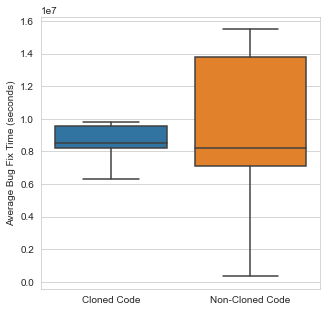

In [84]:
sns.set_style("whitegrid")
plt.figure(figsize=(5,5))
g = sns.boxplot(x="label", y="avg_bug_fix_time", data=bug_commits_date_average,showfliers=False)
#g.set_yscale("log")
g.set(xlabel=' ', ylabel='Average Bug Fix Time (seconds)')
#plt.title('Time consumed to fix bugs')

In [2]:
avg_time_fix_bugs = pd.read_csv('bug_fix_time.csv')

In [3]:
avg_time_fix_bugs

,repoName,label,bug_fix_time_sum,bug_fix_time_count,avg_bug_fix_time
0,BerryNet,Cloned Code,8.258934e+08,100,8258934.0
1,BerryNet,Non-Cloned Code,2.204863e+08,9,24498480.0
2,DeepCTR,Cloned Code,1.198265e+10,1893,6329979.0
3,DeepCTR,Non-Cloned Code,5.581433e+08,81,6890658.0
4,adanet,Cloned Code,2.997260e+09,367,8166922.0
5,adanet,Non-Cloned Code,3.748666e+09,242,15490360.0
6,keras-applications,Cloned Code,7.956749e+08,28,28416960.0
7,keras-applications,Non-Cloned Code,1.566557e+08,18,8703096.0
8,nn-wtf,Cloned Code,2.561683e+08,29,8833389.0
9,nn-wtf,Non-Cloned Code,7.574793e+06,23,329338.8


In [5]:
time = float(input("Input time in seconds: "))
day = time // (24 * 3600)
time = time % (24 * 3600)
hour = time // 3600
time %= 3600
minutes = time // 60
time %= 60
seconds = time
print("d:h:m:s-> %d:%d:%d:%d" % (day, hour, minutes, seconds))

Input time in seconds: 8258934.0
d:h:m:s-> 95:14:8:54


In [22]:
def from_seconds_to_daysH(time):
    #time = row['avg_bug_fix_time']
    day = time // (24 * 3600)
    time = time % (24 * 3600)
    hour = time // 3600
    time %= 3600
    minutes = time // 60
    time %= 60
    seconds = time
    return " %d:%d:%d:%d" % (day, hour, minutes, seconds)

In [12]:
avg_time_fix_bugs['avg_bug_fix_time_dhms'] = avg_time_fix_bugs.apply(from_seconds_to_daysH, axis=1)

In [13]:
avg_time_fix_bugs

,repoName,label,bug_fix_time_sum,bug_fix_time_count,avg_bug_fix_time,avg_bug_fix_time_dhms
0,BerryNet,Cloned Code,8.258934e+08,100,8258934.0,95:14:8:54
1,BerryNet,Non-Cloned Code,2.204863e+08,9,24498480.0,283:13:8:0
2,DeepCTR,Cloned Code,1.198265e+10,1893,6329979.0,73:6:19:39
3,DeepCTR,Non-Cloned Code,5.581433e+08,81,6890658.0,79:18:4:18
4,adanet,Cloned Code,2.997260e+09,367,8166922.0,94:12:35:22
5,adanet,Non-Cloned Code,3.748666e+09,242,15490360.0,179:6:52:40
6,keras-applications,Cloned Code,7.956749e+08,28,28416960.0,328:21:36:0
7,keras-applications,Non-Cloned Code,1.566557e+08,18,8703096.0,100:17:31:36
8,nn-wtf,Cloned Code,2.561683e+08,29,8833389.0,102:5:43:9
9,nn-wtf,Non-Cloned Code,7.574793e+06,23,329338.8,3:19:28:58


In [16]:
strftime(113:13:42:3)

SyntaxError: invalid syntax (<ipython-input-16-c59e15e861ba>, line 1)

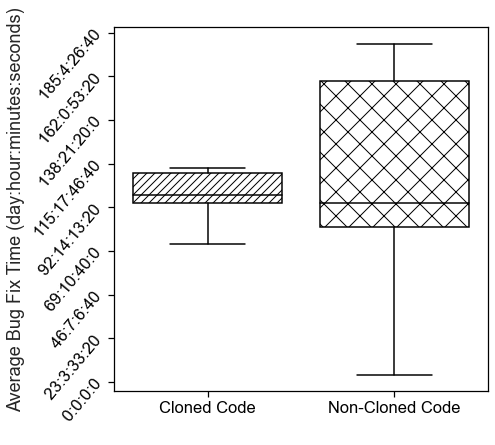

In [34]:
sns.set(rc={'figure.figsize':(6.7,6.7)})
sns.set(font_scale=1.5)
sns.set_style('white')
sns.set_style('ticks', {'axes.edgecolor': '0',  
                        'xtick.color': '0',
                        'ytick.color': '0'})
# Define some hatches
hatches = cycle(['///','x'])

g = sns.boxplot(x="label", y="avg_bug_fix_time", data=avg_time_fix_bugs,showfliers=False,color='black',medianprops=dict(color='black'), 
                  boxprops = dict(facecolor='white',edgecolor='black' ))

#g.set_yscale("log")
yticks = g.get_yticks()
g.set(xlabel=' ', ylabel='Average Bug Fix Time (day:hour:minutes:seconds)')
g.set_yticklabels([from_seconds_to_daysH(tm) for tm in yticks],
 rotation=50)


patches=[]
for i, patch in enumerate(g.artists):
    # Boxes from left to right
    hatch = next(hatches)
    patch.set_hatch(hatch)
    if patch not in patches:
        patches.append(patch)
# type1_patch = Patch(fc='white',edgecolor='black', label='Same file', hatch='///')
# type2_patch = Patch( fc='white',edgecolor='black',label='Same directory',     hatch ='x')
# type3_patch = Patch(fc='white',edgecolor='black', label='Different directories',     hatch ='o')
# legend=plt.legend(handles=[type1_patch, type2_patch, type3_patch],loc='lower center')


fig = g.get_figure()

plt.savefig("ClearImages/avg_time_to_fix_bugs.pdf", bbox_inches='tight')

In [85]:
CC.describe()

,bug_fix_time_sum,bug_fix_time_count,avg_bug_fix_time
count,6.000000e+00,6.000000,6.000000e+00
mean,3.226640e+09,445.333333,1.163645e+07
std,4.421358e+09,721.783532,8.299076e+06
min,2.561683e+08,28.000000,6.329979e+06
25%,8.032295e+08,46.750000,8.189925e+06
50%,1.664043e+09,177.500000,8.546162e+06
75%,2.873494e+09,339.000000,9.567739e+06
max,1.198265e+10,1893.000000,2.841696e+07


In [86]:
NCC.describe()

,bug_fix_time_sum,bug_fix_time_count,avg_bug_fix_time
count,6.000000e+00,6.000000,6.000000e+00
mean,7.895827e+08,63.166667,1.059560e+07
std,1.462785e+09,91.820296,8.349380e+06
min,7.574793e+06,6.000000,3.293388e+05
25%,7.364159e+07,11.250000,7.083419e+06
50%,1.885710e+08,20.500000,8.182399e+06
75%,4.737290e+08,66.500000,1.379354e+07
max,3.748666e+09,242.000000,2.449848e+07


In [79]:
CC = bug_commits_date_average[bug_commits_date_average['label']=='Cloned Code']
NCC = bug_commits_date_average[bug_commits_date_average['label']=='Non-Cloned Code']

In [80]:
stats.mannwhitneyu(CC.avg_bug_fix_time,NCC.avg_bug_fix_time)

MannwhitneyuResult(statistic=15.0, pvalue=0.3444602779022303)

In [83]:
cliffsDelta(CC.avg_bug_fix_time,NCC.avg_bug_fix_time)

0.16666666666666666

In [82]:
def runs(lst):
    "Iterator, chunks repeated values"
    for j,two in enumerate(lst):
        if j == 0:
            one,i = two,0
        if one!=two:
            yield j - i,one
            i = j
        one=two
    yield j - i + 1,two
def cliffsDelta(lst1,lst2): 
    "Returns true if there are more than 'dull' differences"
    m, n = len(lst1), len(lst2)
    lst2 = sorted(lst2)
    j = more = less = 0
    for repeats,x in runs(sorted(lst1)):
        while j <= (n - 1) and lst2[j] <  x: 
            j += 1
        more += j*repeats
        while j <= (n - 1) and lst2[j] == x: 
            j += 1
        less += (n - j)*repeats
    d= (more - less) / (m*n) 
    return abs(d)

In [65]:
cliffsDelta(clean_buggy_commit.bug_fix_time,clones_buggy_commit.bug_fix_time)

0.2286696396125954